In [1]:
# Imports
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc
%matplotlib inline

import ipywidgets

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("nbateamstats_final.csv")

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df)

,teamID,teamName,teamCode,games,fastBreakPoints,pointsInPaint,biggestLead,secondChancePoints,pointsOffTurnovers,longestRun,points,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus,conferenceName,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
0,41,Washington Wizards,WAS,83,816,4052,822,978,1165,883,8972,3352,7129,47.1,1401,1791,77.8,867,2546,34.1,745,2831,3576,2068,1565,535,1058,414,-286,east,12,24,28,21,14,20,27
1,5,Charlotte Hornets,CHA,83,1345,4248,1049,1124,1530,964,9531,3532,7572,46.8,1320,1777,74.4,1147,3156,36.3,906,2790,3696,2316,1643,712,1061,411,11,east,10,27,25,22,21,19,20
2,20,Miami Heat,MIA,83,900,3568,1327,1046,1418,928,9104,3279,7024,46.8,1425,1765,81.2,1121,2958,37.8,814,2809,3623,2110,1703,610,1144,272,364,east,1,35,17,29,24,12,17
3,1,Atlanta Hawks,ATL,83,804,3778,1117,1021,1294,922,9428,3434,7319,47.1,1493,1844,80.8,1067,2856,37.1,837,2804,3641,2040,1549,594,935,353,109,east,8,26,26,27,16,14,25
4,26,Orlando Magic,ORL,84,902,3788,716,1044,1209,951,8714,3196,7395,43.2,1303,1658,78.6,1019,3079,33.0,770,2940,3710,1985,1658,572,1158,384,-644,east,15,12,40,12,10,29,31
5,24,New York Knicks,NYK,83,879,3426,1097,1205,1293,932,8835,3124,7148,43.7,1484,1992,74.5,1103,3076,35.8,954,2873,3827,1816,1687,576,1028,402,9,east,11,22,30,17,20,24,21
6,4,Brooklyn Nets,BKN,83,1135,3790,1092,1130,1301,926,9330,3468,7333,47.5,1444,1796,80.2,950,2636,35.9,855,2821,3676,2088,1686,593,1103,456,50,east,7,31,21,20,24,21,17
7,27,Philadelphia 76ers,PHI,83,1015,3736,1162,933,1318,883,9118,3268,7005,46.8,1623,1982,81.5,959,2635,36.3,710,2790,3500,1963,1608,645,974,436,219,east,4,32,20,24,27,17,14
8,38,Toronto Raptors,TOR,83,1309,3912,1085,1360,1581,906,9056,3367,7572,44.5,1334,1762,75.9,988,2834,34.9,1113,2660,3773,1824,1626,748,979,385,202,east,5,30,22,24,24,17,17
9,2,Boston Celtics,BOS,83,911,3838,1429,1075,1341,907,9231,3364,7226,46.6,1411,1730,81.7,1092,3080,35.1,868,2948,3816,2055,1538,593,1097,484,564,east,2,33,19,28,23,13,18


In [3]:
# Checks data type and missing values
# Should be no missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   teamID              30 non-null     int64  
 1   teamName            30 non-null     object 
 2   teamCode            30 non-null     object 
 3   games               30 non-null     int64  
 4   fastBreakPoints     30 non-null     int64  
 5   pointsInPaint       30 non-null     int64  
 6   biggestLead         30 non-null     int64  
 7   secondChancePoints  30 non-null     int64  
 8   pointsOffTurnovers  30 non-null     int64  
 9   longestRun          30 non-null     int64  
 10  points              30 non-null     int64  
 11  fgm                 30 non-null     int64  
 12  fga                 30 non-null     int64  
 13  fgp                 30 non-null     float64
 14  ftm                 30 non-null     int64  
 15  fta                 30 non-null     int64  
 16  ftp       

In [4]:
# Copies the dataset to change datatype of flotas into integers
# Ensures change does not apply to the original df

df_int = df.copy()
df_int[['fgp', 'ftp', 'tpp']] = df_int[['fgp', 'ftp', 'tpp']].astype(int)
display(df_int)

,teamID,teamName,teamCode,games,fastBreakPoints,pointsInPaint,biggestLead,secondChancePoints,pointsOffTurnovers,longestRun,...,blocks,plusMinus,conferenceName,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
0,41,Washington Wizards,WAS,83,816,4052,822,978,1165,883,...,414,-286,east,12,24,28,21,14,20,27
1,5,Charlotte Hornets,CHA,83,1345,4248,1049,1124,1530,964,...,411,11,east,10,27,25,22,21,19,20
2,20,Miami Heat,MIA,83,900,3568,1327,1046,1418,928,...,272,364,east,1,35,17,29,24,12,17
3,1,Atlanta Hawks,ATL,83,804,3778,1117,1021,1294,922,...,353,109,east,8,26,26,27,16,14,25
4,26,Orlando Magic,ORL,84,902,3788,716,1044,1209,951,...,384,-644,east,15,12,40,12,10,29,31
5,24,New York Knicks,NYK,83,879,3426,1097,1205,1293,932,...,402,9,east,11,22,30,17,20,24,21
6,4,Brooklyn Nets,BKN,83,1135,3790,1092,1130,1301,926,...,456,50,east,7,31,21,20,24,21,17
7,27,Philadelphia 76ers,PHI,83,1015,3736,1162,933,1318,883,...,436,219,east,4,32,20,24,27,17,14
8,38,Toronto Raptors,TOR,83,1309,3912,1085,1360,1581,906,...,385,202,east,5,30,22,24,24,17,17
9,2,Boston Celtics,BOS,83,911,3838,1429,1075,1341,907,...,484,564,east,2,33,19,28,23,13,18


In [5]:
# Dropping unused columns

df_int.drop(columns=['teamID', 'games', 'biggestLead', 'longestRun', 'points', 'plusMinus'], inplace=True)
df_int

,teamName,teamCode,fastBreakPoints,pointsInPaint,secondChancePoints,pointsOffTurnovers,fgm,fga,fgp,ftm,...,turnovers,blocks,conferenceName,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
0,Washington Wizards,WAS,816,4052,978,1165,3352,7129,47,1401,...,1058,414,east,12,24,28,21,14,20,27
1,Charlotte Hornets,CHA,1345,4248,1124,1530,3532,7572,46,1320,...,1061,411,east,10,27,25,22,21,19,20
2,Miami Heat,MIA,900,3568,1046,1418,3279,7024,46,1425,...,1144,272,east,1,35,17,29,24,12,17
3,Atlanta Hawks,ATL,804,3778,1021,1294,3434,7319,47,1493,...,935,353,east,8,26,26,27,16,14,25
4,Orlando Magic,ORL,902,3788,1044,1209,3196,7395,43,1303,...,1158,384,east,15,12,40,12,10,29,31
5,New York Knicks,NYK,879,3426,1205,1293,3124,7148,43,1484,...,1028,402,east,11,22,30,17,20,24,21
6,Brooklyn Nets,BKN,1135,3790,1130,1301,3468,7333,47,1444,...,1103,456,east,7,31,21,20,24,21,17
7,Philadelphia 76ers,PHI,1015,3736,933,1318,3268,7005,46,1623,...,974,436,east,4,32,20,24,27,17,14
8,Toronto Raptors,TOR,1309,3912,1360,1581,3367,7572,44,1334,...,979,385,east,5,30,22,24,24,17,17
9,Boston Celtics,BOS,911,3838,1075,1341,3364,7226,46,1411,...,1097,484,east,2,33,19,28,23,13,18


In [6]:
# Displays full dataset

with pd.option_context('display.max_columns', None):
    display(df_int.describe().style.set_sticky(axis = "index").set_sticky(axis = "columns"))

,fastBreakPoints,pointsInPaint,secondChancePoints,pointsOffTurnovers,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1042.466667,3917.600000,1105.900000,1354.266667,3369.533333,7317.733333,45.633333,1403.966667,1814.000000,76.966667,1031.233333,2922.400000,34.866667,862.233333,2832.500000,3694.733333,2044.000000,1633.400000,635.800000,1088.400000,393.000000,8.000000,26.000000,26.000000,22.300000,18.700000,18.700000,22.300000
std,171.429433,280.544495,141.633171,116.711236,132.814035,204.718635,1.401559,85.421262,112.278902,2.566137,98.426126,252.012944,1.332183,105.678655,97.378306,133.059212,143.079192,91.434016,63.973809,78.950705,55.722836,4.394354,8.136762,8.136762,6.209836,6.080778,6.209836,6.080778
min,804.000000,3426.000000,905.000000,1165.000000,3124.000000,7005.000000,43.000000,1246.000000,1620.000000,71.000000,867.000000,2423.000000,32.000000,710.000000,2655.000000,3500.000000,1816.000000,1450.000000,535.000000,935.000000,272.000000,1.000000,11.000000,13.000000,11.000000,9.000000,9.000000,9.000000
25%,900.500000,3741.000000,1019.500000,1278.000000,3280.750000,7175.000000,45.000000,1339.250000,1744.250000,75.000000,959.000000,2714.500000,34.000000,797.750000,2789.250000,3587.750000,1960.750000,1565.500000,593.250000,1032.750000,356.250000,4.250000,20.500000,19.250000,17.000000,14.000000,14.000000,17.250000
50%,1023.000000,3904.000000,1083.000000,1343.500000,3363.000000,7318.500000,46.000000,1406.000000,1793.500000,77.000000,1011.000000,2898.500000,35.000000,851.500000,2823.000000,3660.000000,2019.500000,1648.500000,619.000000,1097.500000,390.000000,8.000000,27.000000,25.000000,23.500000,19.500000,17.500000,21.500000
75%,1133.250000,4075.000000,1192.250000,1411.500000,3451.500000,7400.250000,46.000000,1469.500000,1913.500000,78.750000,1100.250000,3089.750000,36.000000,909.000000,2912.000000,3777.500000,2106.250000,1686.750000,655.500000,1136.750000,413.500000,11.750000,32.750000,31.500000,27.000000,23.750000,24.000000,27.000000
max,1476.000000,4820.000000,1564.000000,1631.000000,3646.000000,7911.000000,48.000000,1623.000000,2039.000000,81.000000,1217.000000,3416.000000,37.000000,1191.000000,3019.000000,4136.000000,2316.000000,1825.000000,813.000000,1316.000000,544.000000,15.000000,39.000000,41.000000,32.000000,32.000000,30.000000,32.000000


In [7]:
with pd.option_context('display.max_columns', None):
    display(df_int)

,teamName,teamCode,fastBreakPoints,pointsInPaint,secondChancePoints,pointsOffTurnovers,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,conferenceName,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
0,Washington Wizards,WAS,816,4052,978,1165,3352,7129,47,1401,1791,77,867,2546,34,745,2831,3576,2068,1565,535,1058,414,east,12,24,28,21,14,20,27
1,Charlotte Hornets,CHA,1345,4248,1124,1530,3532,7572,46,1320,1777,74,1147,3156,36,906,2790,3696,2316,1643,712,1061,411,east,10,27,25,22,21,19,20
2,Miami Heat,MIA,900,3568,1046,1418,3279,7024,46,1425,1765,81,1121,2958,37,814,2809,3623,2110,1703,610,1144,272,east,1,35,17,29,24,12,17
3,Atlanta Hawks,ATL,804,3778,1021,1294,3434,7319,47,1493,1844,80,1067,2856,37,837,2804,3641,2040,1549,594,935,353,east,8,26,26,27,16,14,25
4,Orlando Magic,ORL,902,3788,1044,1209,3196,7395,43,1303,1658,78,1019,3079,33,770,2940,3710,1985,1658,572,1158,384,east,15,12,40,12,10,29,31
5,New York Knicks,NYK,879,3426,1205,1293,3124,7148,43,1484,1992,74,1103,3076,35,954,2873,3827,1816,1687,576,1028,402,east,11,22,30,17,20,24,21
6,Brooklyn Nets,BKN,1135,3790,1130,1301,3468,7333,47,1444,1796,80,950,2636,35,855,2821,3676,2088,1686,593,1103,456,east,7,31,21,20,24,21,17
7,Philadelphia 76ers,PHI,1015,3736,933,1318,3268,7005,46,1623,1982,81,959,2635,36,710,2790,3500,1963,1608,645,974,436,east,4,32,20,24,27,17,14
8,Toronto Raptors,TOR,1309,3912,1360,1581,3367,7572,44,1334,1762,75,988,2834,34,1113,2660,3773,1824,1626,748,979,385,east,5,30,22,24,24,17,17
9,Boston Celtics,BOS,911,3838,1075,1341,3364,7226,46,1411,1730,81,1092,3080,35,868,2948,3816,2055,1538,593,1097,484,east,2,33,19,28,23,13,18


In [8]:
df_int.sort_values(by = ['conferenceRank'], inplace = True)
with pd.option_context('display.max_columns', None):
    display(df_int)

,teamName,teamCode,fastBreakPoints,pointsInPaint,secondChancePoints,pointsOffTurnovers,fgm,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,conferenceName,conferenceRank,conferenceWin,conferenceLoss,winHome,winAway,lossHome,lossAway
2,Miami Heat,MIA,900,3568,1046,1418,3279,7024,46,1425,1765,81,1121,2958,37,814,2809,3623,2110,1703,610,1144,272,east,1,35,17,29,24,12,17
22,Phoenix Suns,PHX,1045,4118,1019,1490,3614,7480,48,1314,1649,79,959,2645,36,820,2943,3763,2262,1656,708,1024,366,west,1,39,13,32,32,9,9
9,Boston Celtics,BOS,911,3838,1075,1341,3364,7226,46,1411,1730,81,1092,3080,35,868,2948,3816,2055,1538,593,1097,484,east,2,33,19,28,23,13,18
15,Memphis Grizzlies,MEM,1476,4820,1564,1529,3646,7911,46,1428,1946,73,960,2737,35,1191,2945,4136,2174,1655,813,1047,544,west,2,36,16,30,26,11,15
20,Golden State Warriors,GSW,1148,3718,1052,1483,3380,7239,46,1300,1692,77,1197,3299,36,824,2994,3818,2261,1761,740,1215,387,west,3,33,19,31,22,10,19
11,Milwaukee Bucks,MIL,1083,3716,1127,1249,3462,7402,46,1468,1891,77,1165,3183,36,857,3019,3876,1977,1509,621,1070,334,east,3,33,19,27,24,14,17
17,Dallas Mavericks,DAL,830,3542,909,1226,3248,7058,46,1361,1760,77,1084,3102,35,767,2789,3556,1933,1630,557,966,330,west,4,36,16,29,23,12,18
7,Philadelphia 76ers,PHI,1015,3736,933,1318,3268,7005,46,1623,1982,81,959,2635,36,710,2790,3500,1963,1608,645,974,436,east,4,32,20,24,27,17,14
25,Utah Jazz,UTA,839,3962,1239,1218,3362,7139,47,1487,1936,77,1203,3339,36,892,2942,3834,1858,1567,595,1098,405,west,5,33,19,29,20,12,21
8,Toronto Raptors,TOR,1309,3912,1360,1581,3367,7572,44,1334,1762,75,988,2834,34,1113,2660,3773,1824,1626,748,979,385,east,5,30,22,24,24,17,17


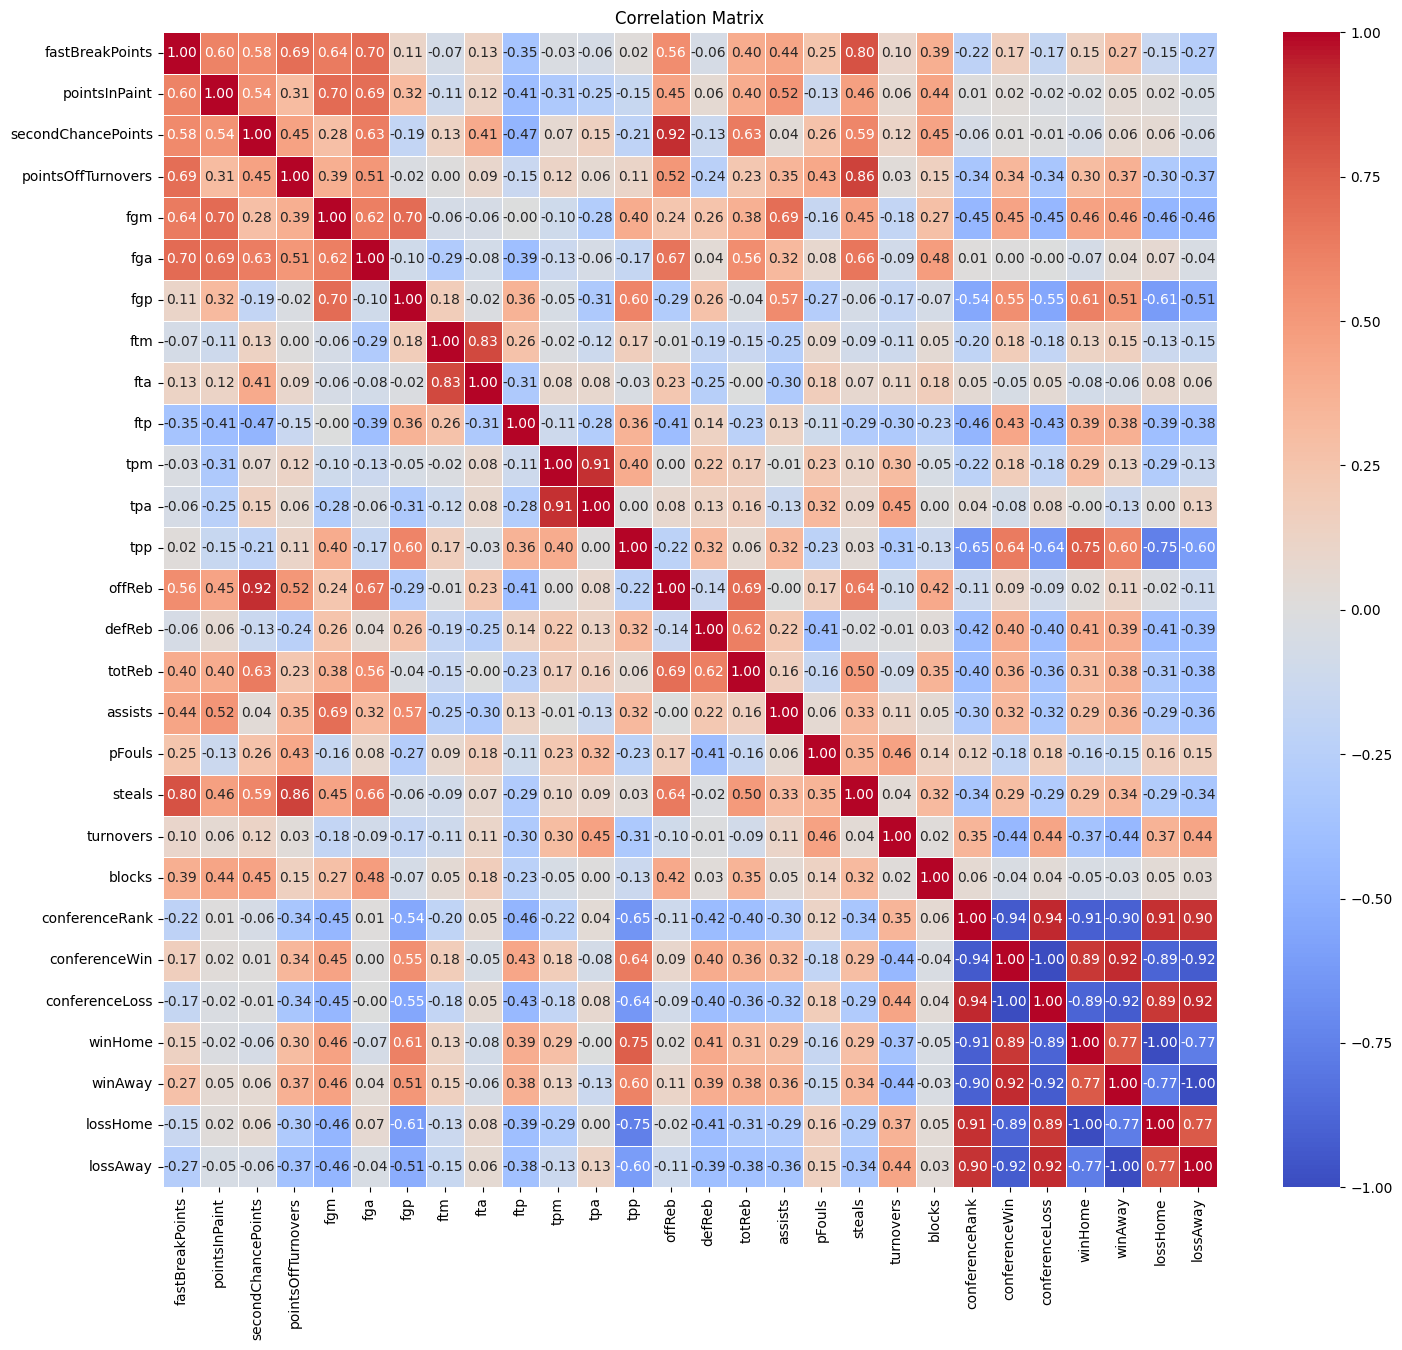

In [9]:
# Full-sized correlation matrix

correlation_matrix = df_int.corr()

plt.figure(figsize = (17, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

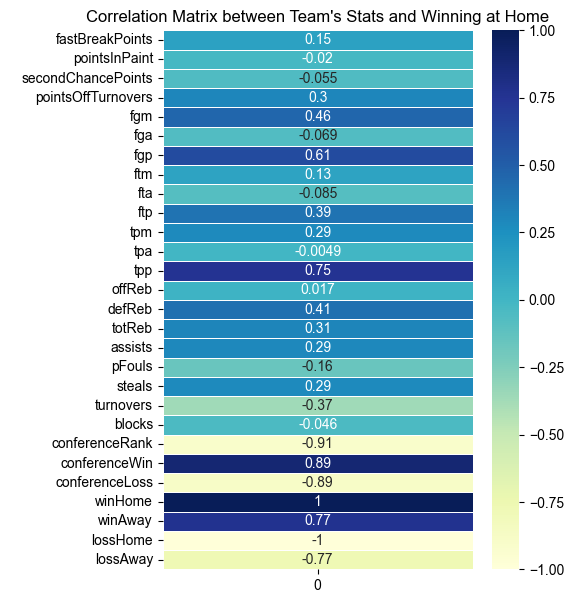

In [21]:
# Correlation matrix on important features to win at home

df_int_winHome = df_int.corrwith(df_int['winHome'])

plt.figure(figsize = (5, 7))
sns.heatmap(df_int_winHome.to_frame(), annot = True, linewidths = 0.5, cmap='YlGnBu')
plt.title('Correlation Matrix between Team\'s Stats and Winning at Home')
plt.show()

# pointsOffTurnovers 0.3
# fgm 0.46
# tpm 0.29
# defReb 0.41
# assists 0.29
# steals 0.29

# fgm is the highest feature correlating with a team winning home games
# defReb has a higher correlation than steals in regards to defensive features 

<Figure size 700x500 with 0 Axes>

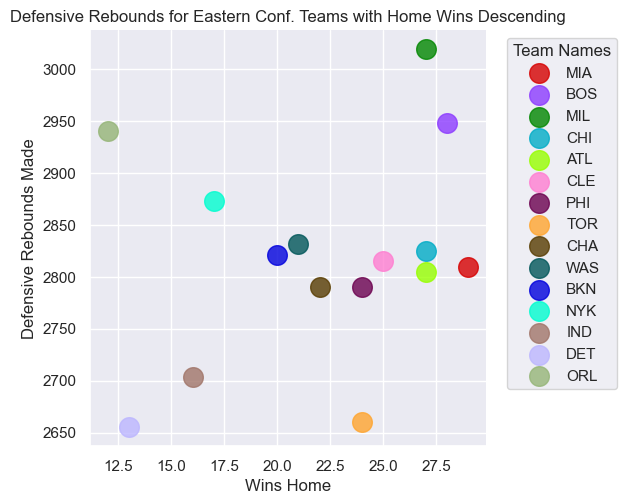

In [26]:
# Visualizing the effect of defReb on team's Home Wins - Eastern Conference

custom_palette = sns.color_palette(cc.glasbey, n_colors=15)

east_conf = 'east'
df_int_east_conf = df_int[df_int['conferenceName'] == east_conf].sort_values(by = 'winHome', ascending=False)

plt.figure(figsize = (7, 5))
sns.set(style='darkgrid')
sns.lmplot(data = df_int_east_conf
           , x = 'winHome'
           , y = 'defReb'
           , scatter = True
           , hue = 'teamCode'
           , scatter_kws = {'s': 200}
           , palette = custom_palette
           , line_kws = {'color': 'orange'}
           , legend = False
           , fit_reg = True)

plt.title('Defensive Rebounds for Eastern Conf. Teams with Home Wins Descending')
plt.xlabel('Wins Home')
plt.ylabel('Defensive Rebounds Made')
plt.legend(title = 'Team Names', loc = 'upper right', bbox_to_anchor = (1.35, 1.0), ncol = 1)
plt.show()

<Figure size 700x500 with 0 Axes>

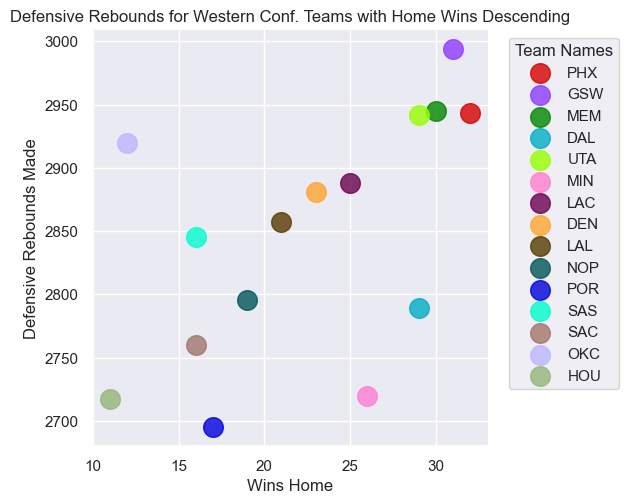

In [27]:
# Visualizing the effect of defReb on team's Home Wins - Western Conference

custom_palette = sns.color_palette(cc.glasbey, n_colors=15)

west_conf = 'west'
df_int_west_conf = df_int[df_int['conferenceName'] == west_conf].sort_values(by = 'winHome', ascending=False)

plt.figure(figsize = (7, 5))
sns.lmplot(data = df_int_west_conf
           , x = 'winHome'
           , y = 'defReb'
           , scatter = True
           , hue = 'teamCode'
           , scatter_kws = {'s': 200}
           , palette = custom_palette
           , line_kws = {'color': 'orange'}
           , legend = False
           , fit_reg = True)

plt.title('Defensive Rebounds for Western Conf. Teams with Home Wins Descending')
plt.xlabel('Wins Home')
plt.ylabel('Defensive Rebounds Made')
plt.legend(title = 'Team Names', loc = 'upper right', bbox_to_anchor = (1.35, 1.0), ncol = 1)
plt.show()

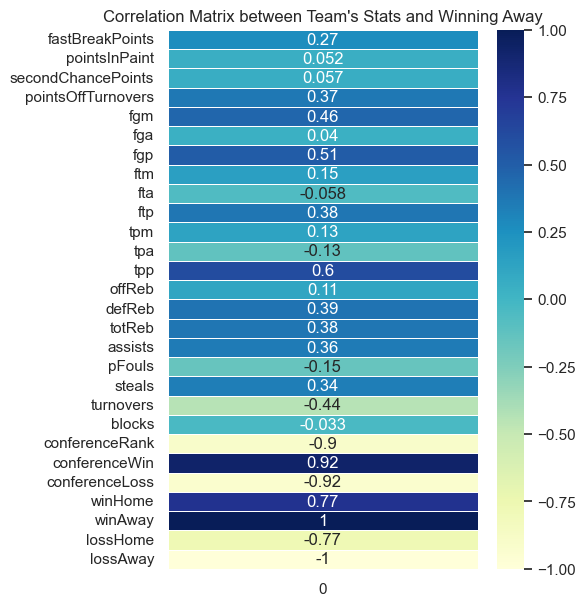

In [28]:
# Correlation matrix on important features to win away

df_int_winAway = df_int.corrwith(df_int['winAway'])

plt.figure(figsize=(5, 7))
sns.heatmap(df_int_winAway.to_frame(), annot=True, linewidths=0.5, cmap='YlGnBu')
plt.title('Correlation Matrix between Team\'s Stats and Winning Away')
plt.show()
    
# fastBreakPoints 0.27
# pointsOffTurnovers 0.37
# fgm 0.46
# defReb 0.39
# assists 0.36
# steals 0.34

# fastBreakPoints is the only difference between winning home and winning away
# fgm is the highest features correlating with a team winning away games
# defensive features = defReb, steals

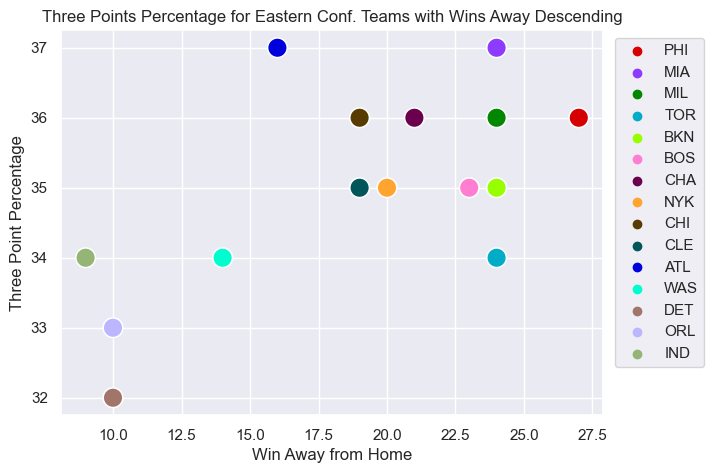

In [42]:
# Visualizing the effect of tpp on team's Away Wins - Eastern Conference

custom_palette = sns.color_palette(cc.glasbey, n_colors=15)

east_conf = 'east'
df_int_east_conf = df_int[df_int['conferenceName'] == east_conf].sort_values(by='winAway', ascending=False)


plt.figure(figsize=(7, 5))
ax = sns.scatterplot(data = df_int_east_conf
                     , x = df_int_east_conf.winAway
                     , y = df_int_east_conf.tpp
                     , hue = df_int_east_conf.teamCode
                     , palette = custom_palette
                    , s=200)
plt.title('Three Points Percentage for Eastern Conf. Teams with Wins Away Descending')
ax.set(xlabel = 'Win Away from Home', ylabel = 'Three Point Percentage')
plt.legend(loc ='upper right', bbox_to_anchor=(1.2, 1), ncol=1)
plt.show()

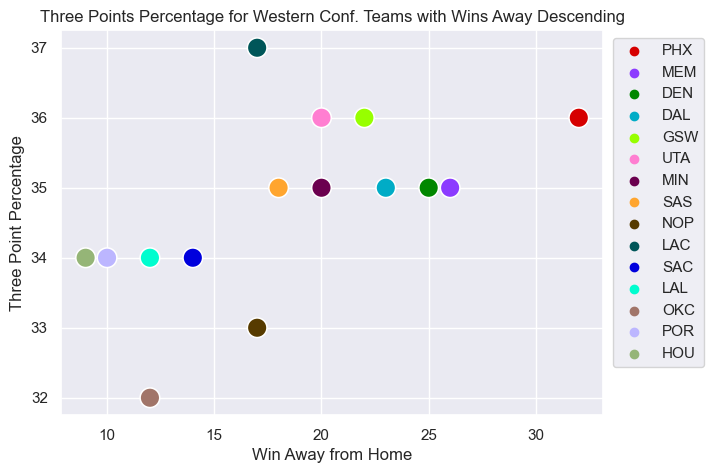

In [43]:
# Visualizing the effect of tpp on team's Away Wins - Western Conference

custom_palette = sns.color_palette(cc.glasbey, n_colors=15)

west_conf = 'west'
df_int_west_conf = df_int[df_int['conferenceName'] == west_conf].sort_values(by='winAway', ascending=False)


plt.figure(figsize=(7, 5))
ax = sns.scatterplot(data = df_int_west_conf
                     , x = df_int_west_conf.winAway
                     , y = df_int_west_conf.tpp
                     , hue = df_int_west_conf.teamCode
                     , palette = custom_palette
                    , s=200)
plt.title('Three Points Percentage for Western Conf. Teams with Wins Away Descending')
ax.set(xlabel = 'Win Away from Home', ylabel = 'Three Point Percentage')
plt.legend(loc ='upper right', bbox_to_anchor=(1.2, 1), ncol=1)
plt.show()

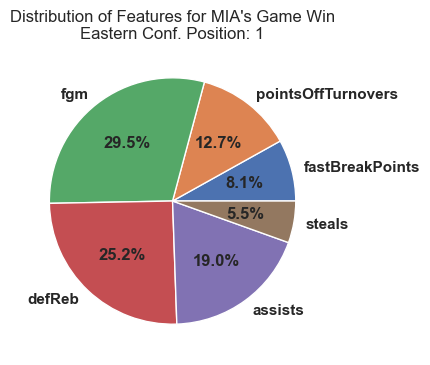

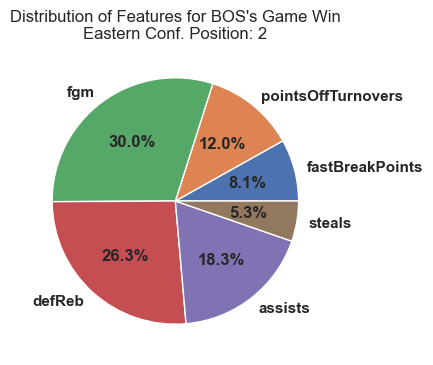

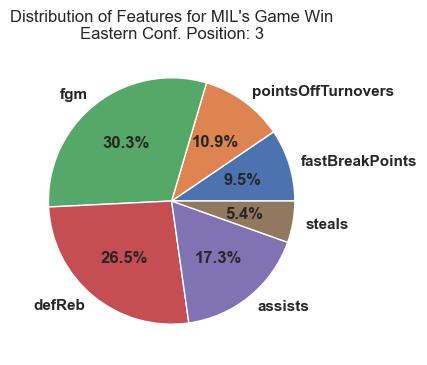

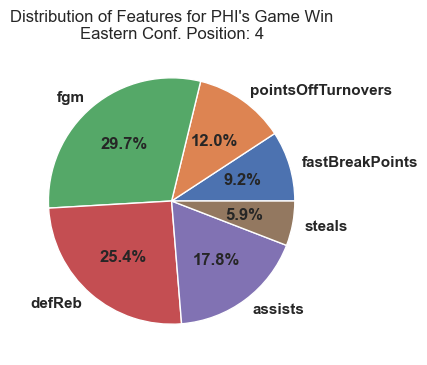

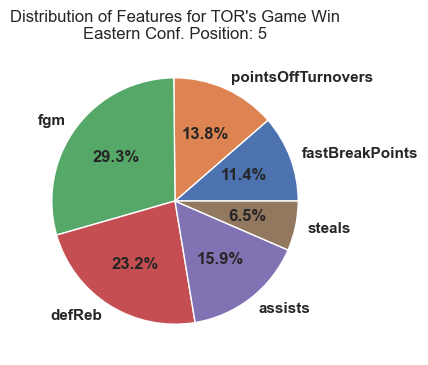

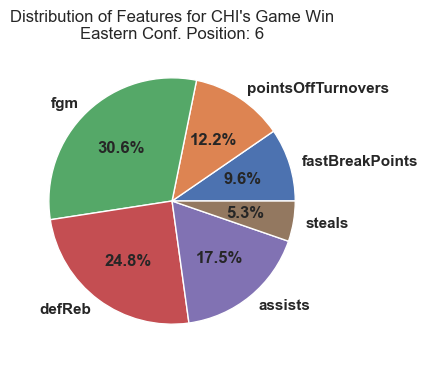

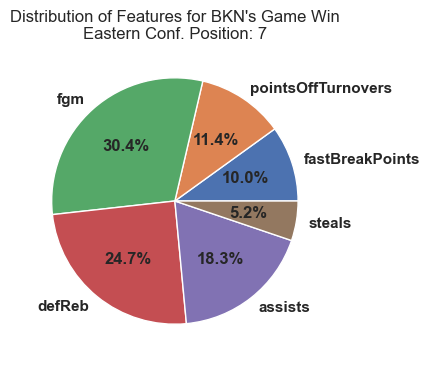

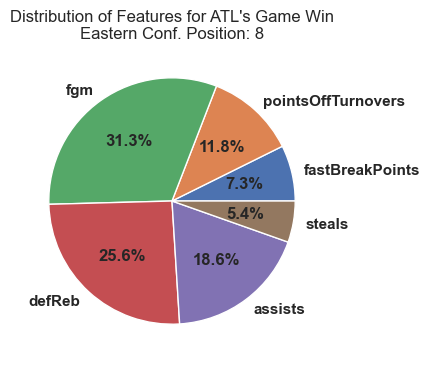

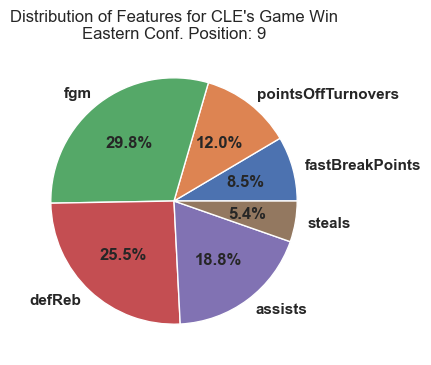

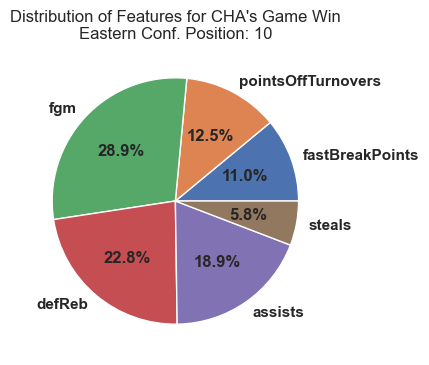

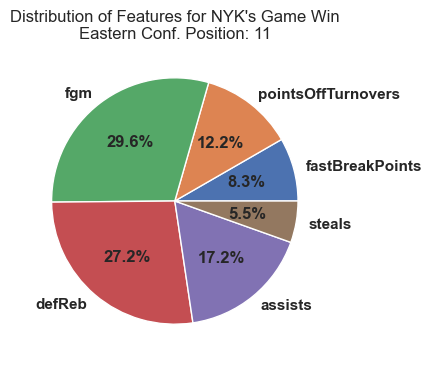

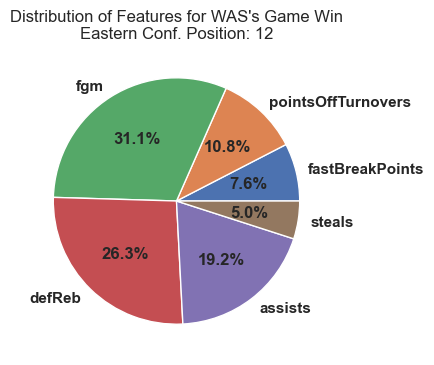

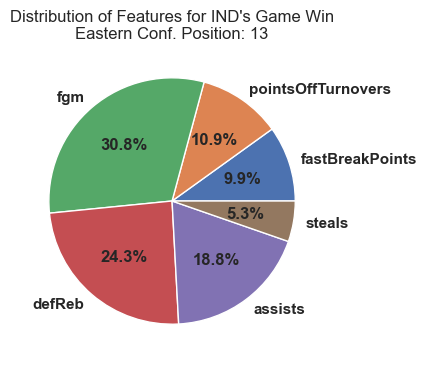

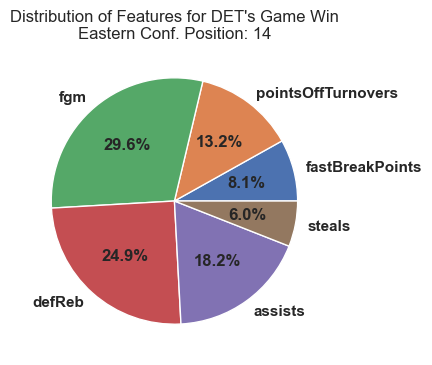

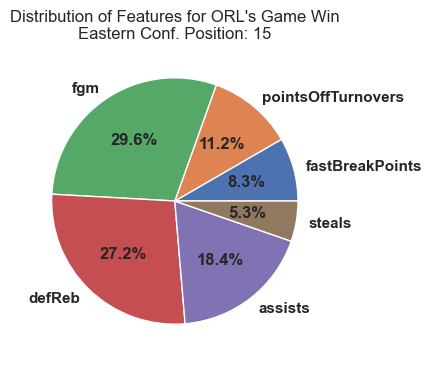

In [33]:
# Distribution of Features on Wins - Eastern Conference 

def pie_chart_features_dist(df, features, team_names):
    for team_name in team_names:
        df_team = df[df['teamCode'] == team_name]

        # Calculate total for each feature for the current team
        feature_totals = df_team[features].sum()

        plt.figure(figsize=(4,4))
        plt.pie(feature_totals, labels=feature_totals.index, autopct='%1.1f%%'
               , textprops={'fontweight': 'bold'})
        
        # Team's rank in Conference
        conference_rank = df_team['conferenceRank'].values[0]
        plt.title(f'Distribution of Features for {team_name}\'s Game Win\nEastern Conf. Position: {conference_rank}')
        
        plt.show()

team_names = ['MIA', 'BOS', 'MIL', 'PHI', 'TOR'
             , 'CHI', 'BKN', 'ATL', 'CLE', 'CHA'
             , 'NYK', 'WAS', 'IND', 'DET', 'ORL']

pie_chart_features = ['fastBreakPoints'
                      , 'pointsOffTurnovers'
                      , 'fgm'
                      , 'defReb'
                      , 'assists'
                      , 'steals']

df_int_east_conf = df_int[df_int['conferenceName'] == east_conf].sort_values(by='conferenceRank', ascending=True)

pie_chart_features_dist(df_int_east_conf, pie_chart_features, team_names)

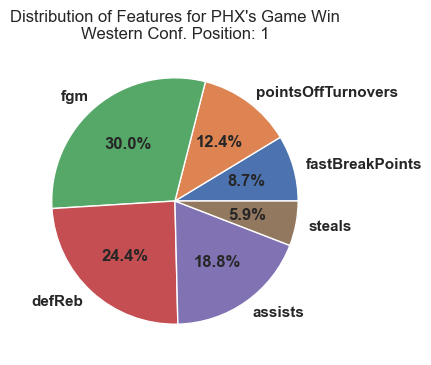

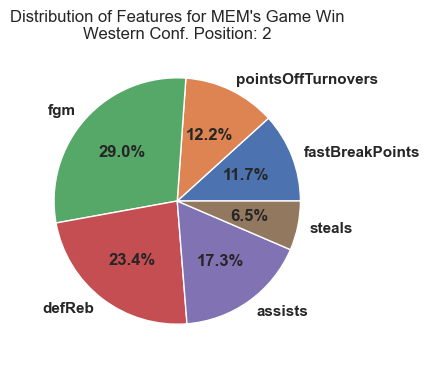

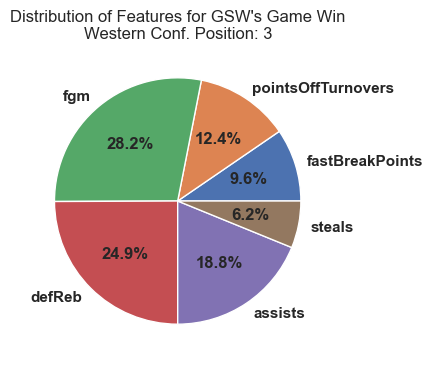

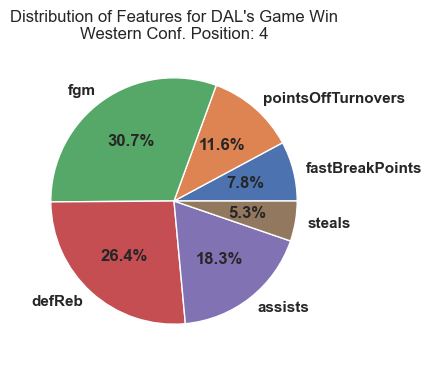

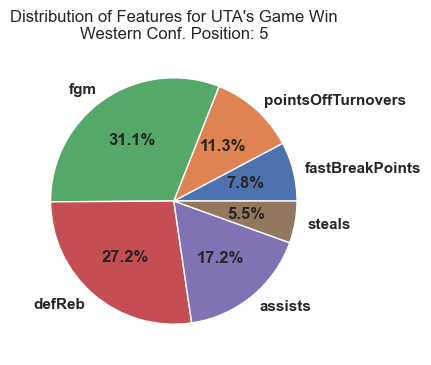

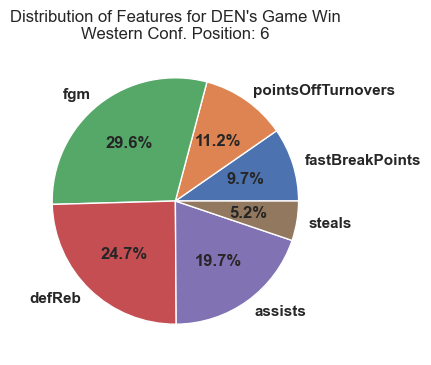

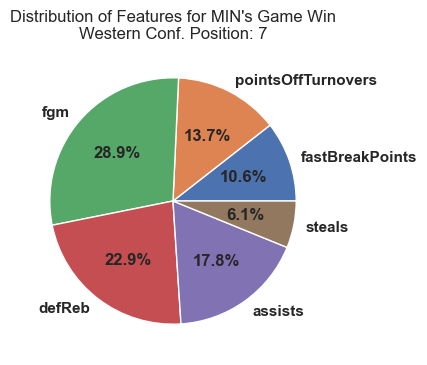

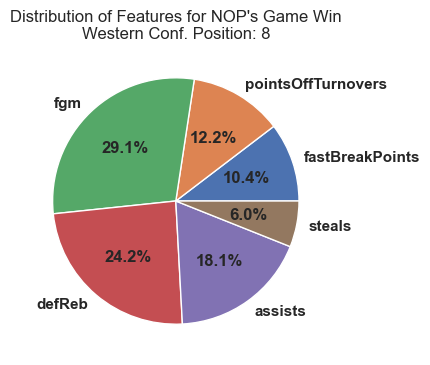

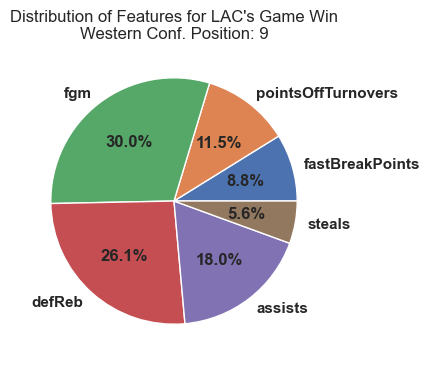

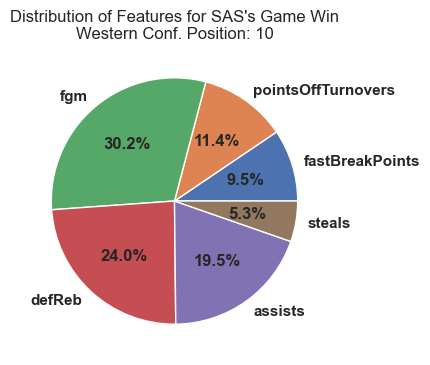

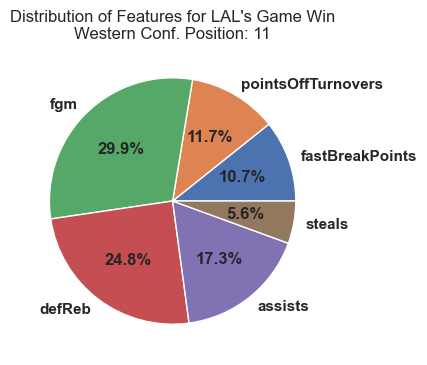

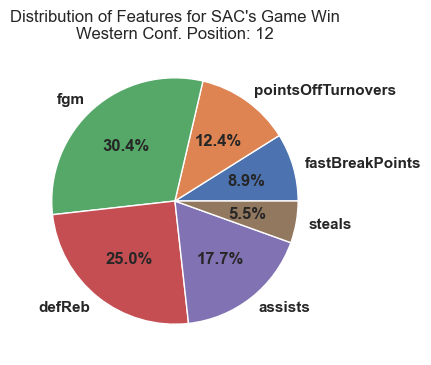

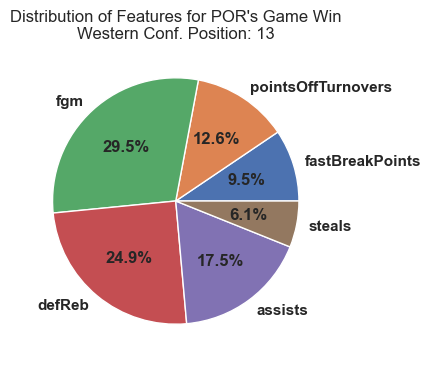

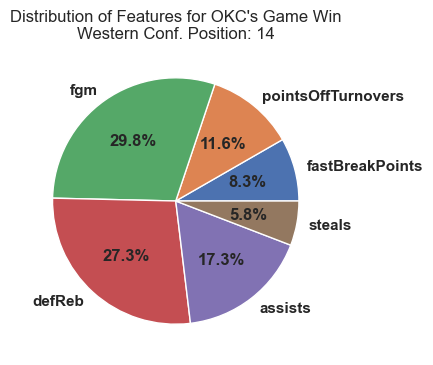

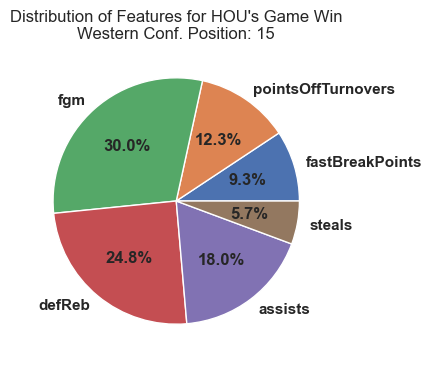

In [34]:
# Distribution of Features on Wins - Western Conference 
def pie_chart_features_dist(df, features, team_names):
    for team_name in team_names:
        df_team = df[df['teamCode'] == team_name]

        # Calculate total for each feature for the current team
        feature_totals = df_team[features].sum()

        plt.figure(figsize=(4,4))
        plt.pie(feature_totals, labels=feature_totals.index, autopct='%1.1f%%'
               , textprops={'fontweight': 'bold'})
        
        # Team's rank in Conference
        conference_rank = df_team['conferenceRank'].values[0]
        plt.title(f'Distribution of Features for {team_name}\'s Game Win\nWestern Conf. Position: {conference_rank}')
        
        plt.show()

team_names = ['PHX', 'MEM', 'GSW', 'DAL', 'UTA'
             , 'DEN', 'MIN', 'NOP', 'LAC', 'SAS'
             , 'LAL', 'SAC', 'POR', 'OKC', 'HOU']

pie_chart_features = ['fastBreakPoints'
                      , 'pointsOffTurnovers'
                      , 'fgm'
                      , 'defReb'
                      , 'assists'
                      , 'steals']

df_int_west_conf = df_int[df_int['conferenceName'] == west_conf].sort_values(by='conferenceRank', ascending=True)

pie_chart_features_dist(df_int_west_conf, pie_chart_features, team_names)

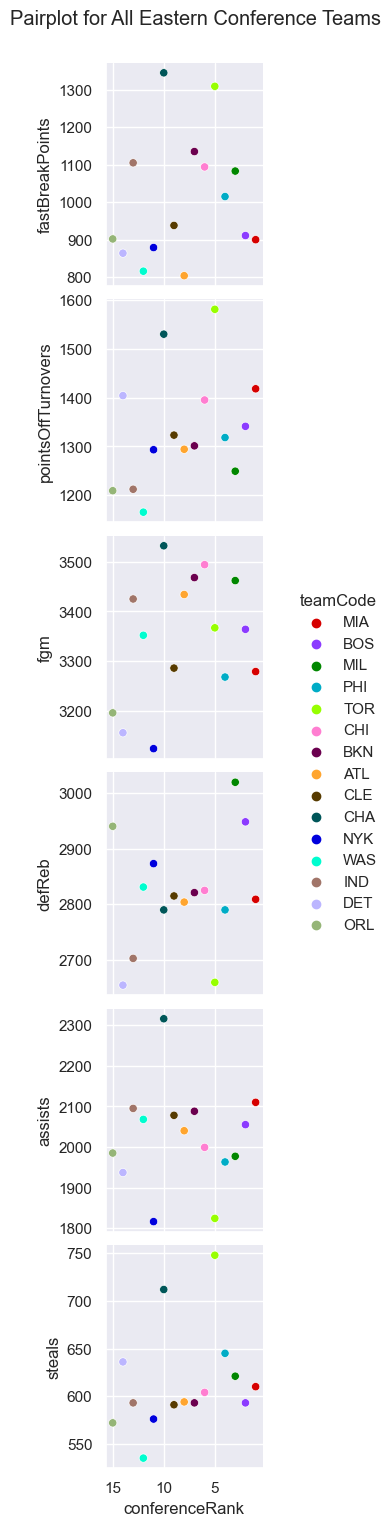

In [35]:
def pairplot(df, features, palette):
    
    sns.pairplot(df, x_vars = ['conferenceRank'], y_vars = features, hue = 'teamCode'
                 , palette = palette, diag_kind = 'kde')
    plt.suptitle('Pairplot for All Eastern Conference Teams', y=1.02)
    plt.gca().invert_xaxis() # Invert X-Axis so best-ranked team is on the right and vice-versa
    plt.show()

team_names = ['MIA', 'BOS', 'MIL', 'PHI', 'TOR',
              'CHI', 'BKN', 'ATL', 'CLE', 'CHA',
              'NYK', 'WAS', 'IND', 'DET', 'ORL']

pairplot_features = ['fastBreakPoints', 'pointsOffTurnovers',
                'fgm', 'defReb', 'assists', 'steals']

custom_palette = sns.color_palette(cc.glasbey, n_colors=15)

east_conf = 'east'
df_int_east_conf = df_int[df_int['conferenceName'] == east_conf].sort_values(by='conferenceRank', ascending=True)


pairplot(df_int_east_conf, pairplot_features, custom_palette)
